In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Inserciones

In [81]:
df_id = pd.read_csv("inserciones_id.csv")
df_usr = pd.read_csv("inserciones_username.csv")
df_dv_id = pd.read_csv("dv_inserciones_id.csv")
df_dv_usr = pd.read_csv("dv_inserciones_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.518107  1.048848  1.595175  2.139261   
1      hashing_cerrado_lineal  0.398295  0.796437  1.216592  1.642497   
2  hashing_cerrado_cuadratico  0.382487  0.770747  1.184380  1.601348   
3       hashing_cerrado_doble  0.395838  0.794307  1.221482  1.657692   
4          std::unordered_map  0.412551  0.814007  1.273146  1.633029   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  2.691127  3.130156  3.671578  4.211381  4.741373  ...  5.858876  6.395701   
1  2.078093  2.428446  2.827267  3.213833  3.610366  ...  4.401044  4.766645   
2  2.052215  2.410302  2.807210  3.195485  3.582109  ...  4.359477  4.721660   
3  2.116438  2.492721  2.899765  3.297039  3.693944  ...  4.496882  4.881202   
4  2.042082  2.566506  2.931277  3.295679  3.687796  ...  4.904389  5.251827   

      13000     14000     15000     16000     17000     18000      19000  \
0  6

In [82]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="inserciones", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="inserciones", value_name="tiempo")

df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_inserciones", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_inserciones", value_name="tiempo_err")["tiempo_err"]

print(df_id_melted.head())
print(df_usr_melted.head())


df_id_melted['inserciones'] = df_id_melted['inserciones'].astype(int)
df_usr_melted['inserciones'] = df_usr_melted['inserciones'].astype(int)

                         mapa inserciones    tiempo  tiempo_err
0             hashing_abierto        1000  0.518107    0.039316
1      hashing_cerrado_lineal        1000  0.398295    0.041130
2  hashing_cerrado_cuadratico        1000  0.382487    0.039113
3       hashing_cerrado_doble        1000  0.395838    0.039578
4          std::unordered_map        1000  0.412551    0.032675
                         mapa inserciones    tiempo  tiempo_err
0             hashing_abierto        1000  0.741592    0.038290
1      hashing_cerrado_lineal        1000  0.627240    0.035677
2  hashing_cerrado_cuadratico        1000  0.619056    0.033815
3       hashing_cerrado_doble        1000  0.793148    0.041298
4          std::unordered_map        1000  0.402811    0.022536


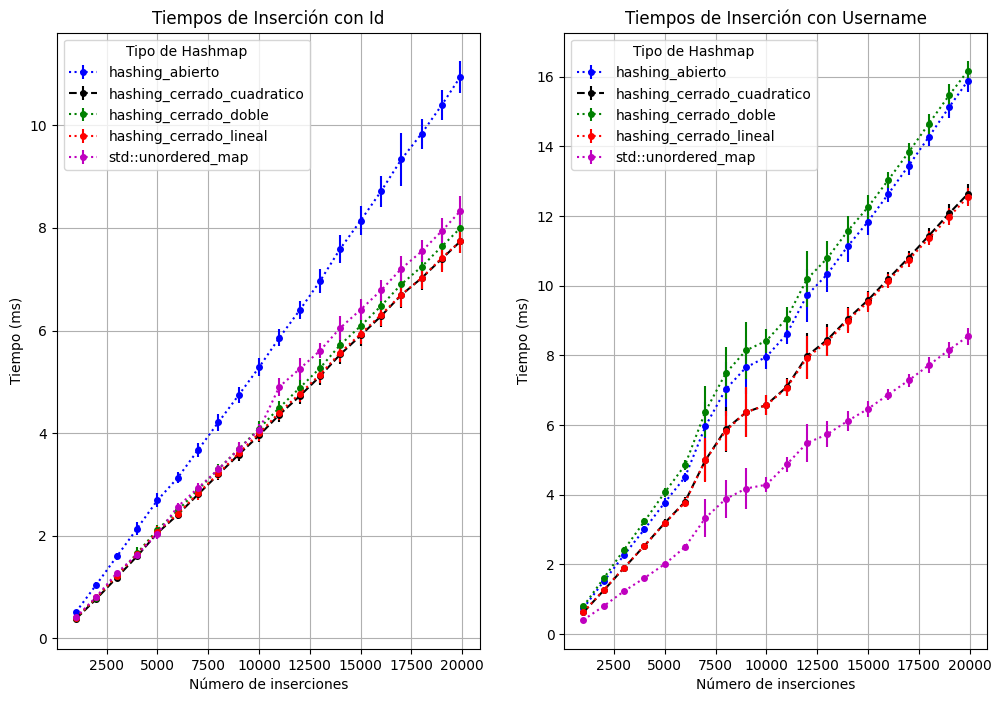

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["inserciones"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["inserciones"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de inserciones")

axes[0].set(title="Tiempos de Inserción con Id")
axes[1].set(title="Tiempos de Inserción con Username")

plt.savefig("inserciones.png", bbox_inches="tight")
plt.show()


# Busquedas Tipo 1

In [84]:
df_id = pd.read_csv("busquedas1_id.csv")
df_usr = pd.read_csv("busquedas1_username.csv")
df_dv_id = pd.read_csv("dv_busquedas1_id.csv")
df_dv_usr = pd.read_csv("dv_busquedas1_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.187283  0.372630  0.564822  0.756633   
1      hashing_cerrado_lineal  0.057456  0.111517  0.165755  0.218696   
2  hashing_cerrado_cuadratico  0.056809  0.111264  0.163802  0.217327   
3       hashing_cerrado_doble  0.067876  0.132480  0.199236  0.259756   
4          std::unordered_map  0.156012  0.311962  0.465964  0.612016   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  1.003092  1.213372  1.479095  1.740220  1.985310  ...  2.559322  2.793697   
1  0.275435  0.329265  0.385911  0.442468  0.493824  ...  0.612990  0.672497   
2  0.274060  0.328958  0.384088  0.440492  0.491506  ...  0.598431  0.655566   
3  0.330561  0.393778  0.461778  0.527824  0.589080  ...  0.720578  0.788239   
4  0.791978  0.949469  1.152651  1.361872  1.532555  ...  1.962174  2.121803   

      13000     14000     15000     16000     17000     18000     19000  \
0  3.

In [85]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="busquedas", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="busquedas", value_name="tiempo")
df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]

print(df_id_melted.head())
print(df_usr_melted.head())

df_id_melted["busquedas"] = df_id_melted["busquedas"].astype(int)
df_usr_melted["busquedas"] = df_usr_melted["busquedas"].astype(int)

                         mapa busquedas    tiempo  tiempo_err
0             hashing_abierto      1000  0.187283    0.025486
1      hashing_cerrado_lineal      1000  0.057456    0.011236
2  hashing_cerrado_cuadratico      1000  0.056809    0.011366
3       hashing_cerrado_doble      1000  0.067876    0.012535
4          std::unordered_map      1000  0.156012    0.021975
                         mapa busquedas    tiempo  tiempo_err
0             hashing_abierto      1000  0.394818    0.029714
1      hashing_cerrado_lineal      1000  0.247819    0.023885
2  hashing_cerrado_cuadratico      1000  0.247384    0.023067
3       hashing_cerrado_doble      1000  0.429342    0.031537
4          std::unordered_map      1000  0.181955    0.022928


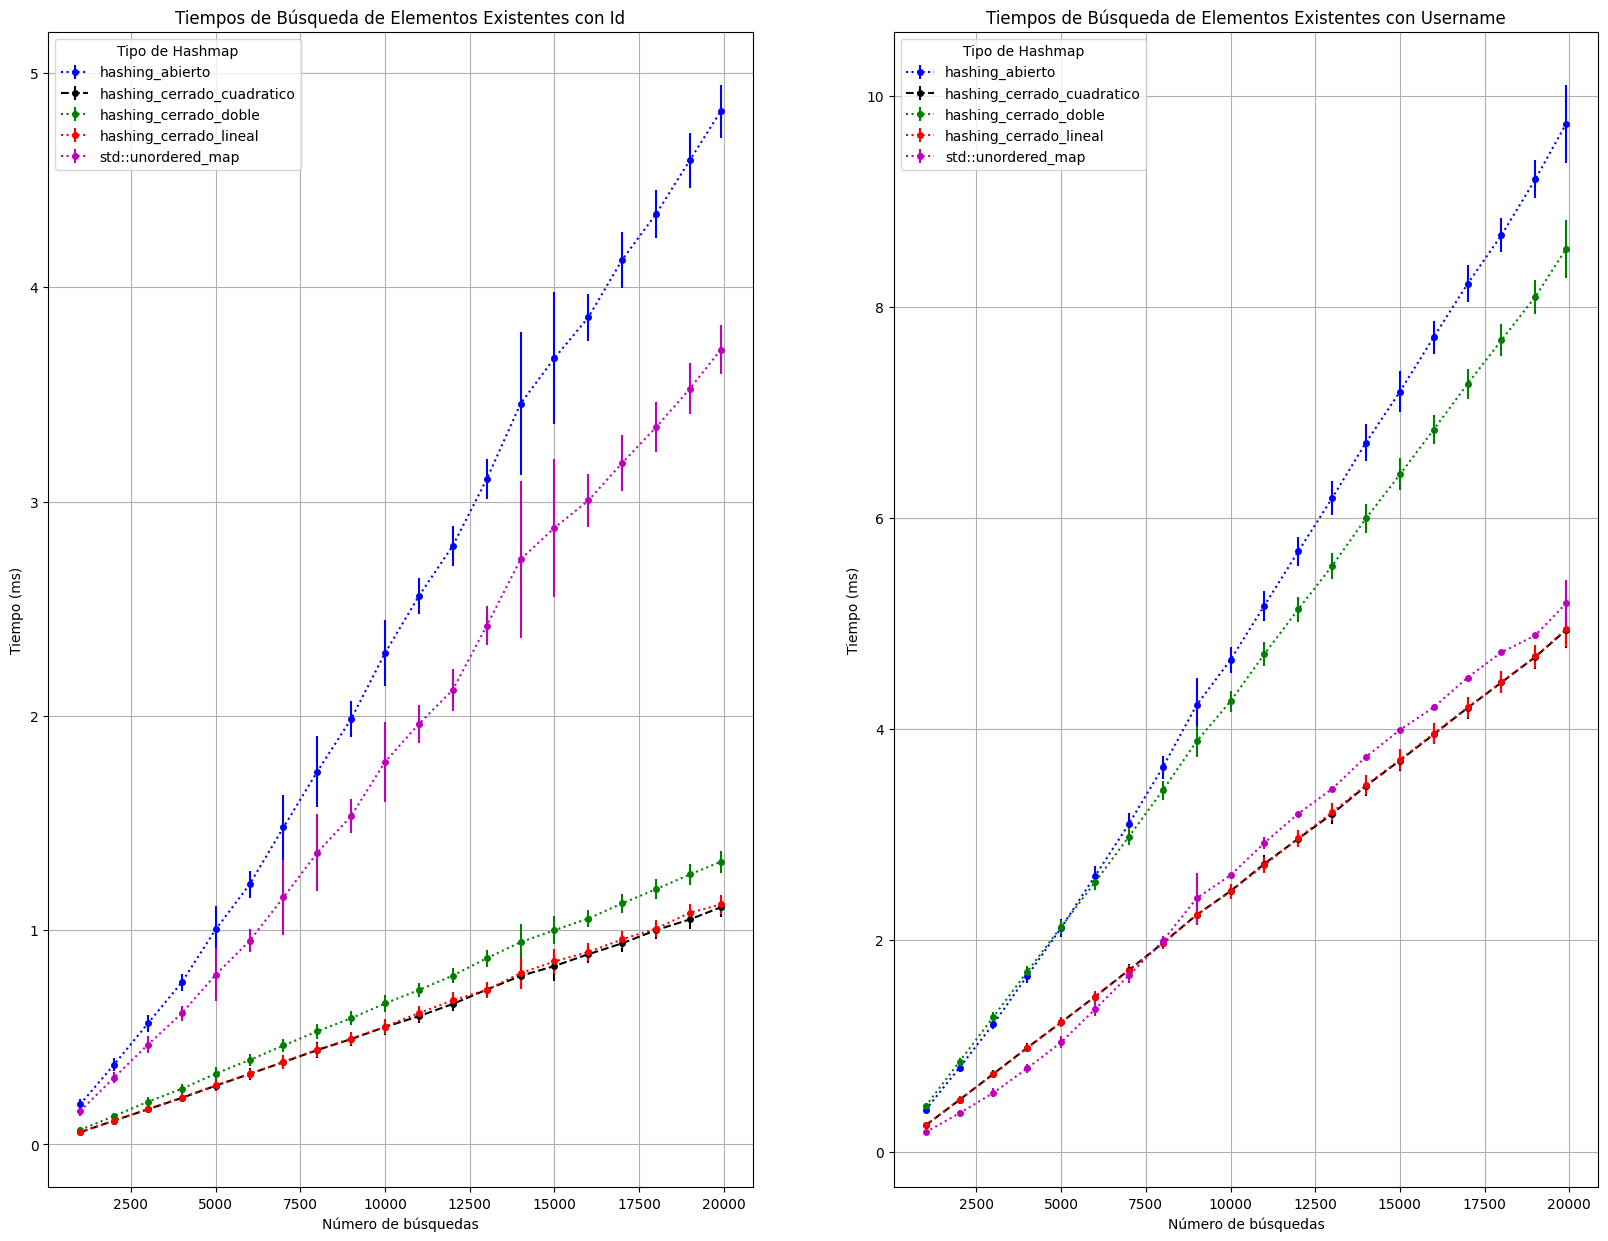

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,15))

styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i],yerr=grp["tiempo_err"])
    i += 1

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de búsquedas")

axes[0].set(title="Tiempos de Búsqueda de Elementos Existentes con Id")
axes[1].set(title="Tiempos de Búsqueda de Elementos Existentes con Username")

plt.savefig("busquedas_1.png", bbox_inches="tight")
plt.show()

# Busquedas Tipo 2

In [87]:
df_id = pd.read_csv("busquedas2_id.csv")
df_usr = pd.read_csv("busquedas2_username.csv")
df_dv_id = pd.read_csv("dv_busquedas2_id.csv")
df_dv_usr = pd.read_csv("dv_busquedas2_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.085060  0.169339  0.263133  0.329100   
1      hashing_cerrado_lineal  0.058030  0.113930  0.172508  0.219489   
2  hashing_cerrado_cuadratico  0.057891  0.112258  0.170830  0.220715   
3       hashing_cerrado_doble  0.068696  0.135634  0.207222  0.264378   
4          std::unordered_map  0.140780  0.282120  0.432826  0.546943   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  0.407411  0.486653  0.589930  0.659585  0.755005  ...  0.922825  1.010188   
1  0.272316  0.326335  0.385537  0.436848  0.494086  ...  0.601385  0.655970   
2  0.271592  0.325572  0.383933  0.436399  0.491636  ...  0.599774  0.650824   
3  0.327167  0.391998  0.461475  0.525101  0.595080  ...  0.720472  0.784929   
4  0.677342  0.806234  0.972586  1.093384  1.256093  ...  1.520296  1.656343   

      13000     14000     15000     16000     17000     18000     19000  \
0  1.

In [88]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="busquedas", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="busquedas", value_name="tiempo")
df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]

print(df_id_melted.head())
print(df_usr_melted.head())

df_id_melted["busquedas"] = df_id_melted["busquedas"].astype(int)
df_usr_melted["busquedas"] = df_usr_melted["busquedas"].astype(int)

                         mapa busquedas    tiempo  tiempo_err
0             hashing_abierto      1000  0.085060    0.018007
1      hashing_cerrado_lineal      1000  0.058030    0.012531
2  hashing_cerrado_cuadratico      1000  0.057891    0.013198
3       hashing_cerrado_doble      1000  0.068696    0.013212
4          std::unordered_map      1000  0.140780    0.027364
                         mapa busquedas    tiempo  tiempo_err
0             hashing_abierto      1000  0.267396    0.029418
1      hashing_cerrado_lineal      1000  0.238930    0.026157
2  hashing_cerrado_cuadratico      1000  0.238704    0.024290
3       hashing_cerrado_doble      1000  0.412317    0.033373
4          std::unordered_map      1000  0.133201    0.028965


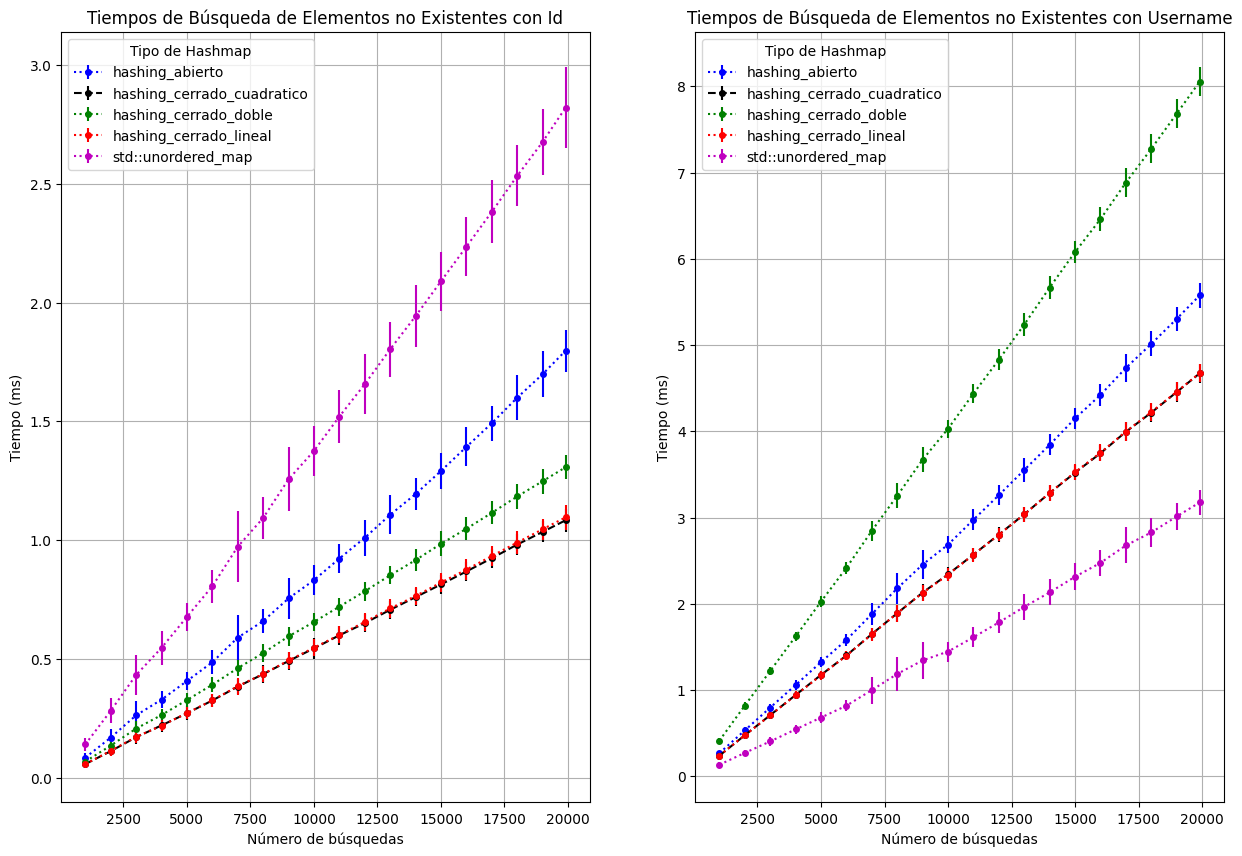

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))


styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1
    
for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de búsquedas")

axes[0].set(title="Tiempos de Búsqueda de Elementos no Existentes con Id")
axes[1].set(title="Tiempos de Búsqueda de Elementos no Existentes con Username")

plt.savefig("busquedas_2.png", bbox_inches="tight")
plt.show()